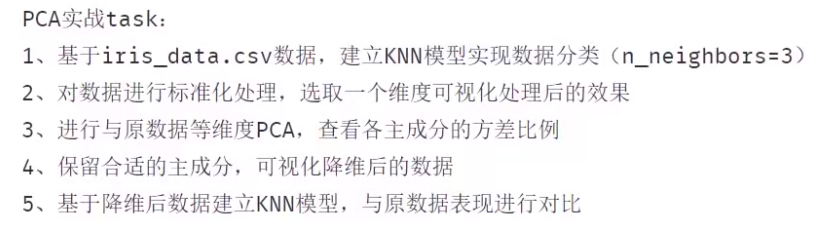

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
X = load_iris().data
y = load_iris().target

# knn模型

In [3]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, y)
y_predict = KNN.predict(X)
print(KNN.score(X, y))

0.96


In [4]:
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.96


# 标准化处理

In [5]:
X_norm = StandardScaler().fit_transform(X)

### 计算均值和标准差

In [6]:
x_mean = X[:, 0].mean()
x_norm_mean = X_norm[:, 0].mean()

x_sigma = X[:, 0].std()
x_norm_sigma = X_norm[:, 0].std()

print(x_mean, x_sigma, x_norm_mean, x_norm_sigma)

5.843333333333334 0.8253012917851409 -1.4684549872375404e-15 1.0


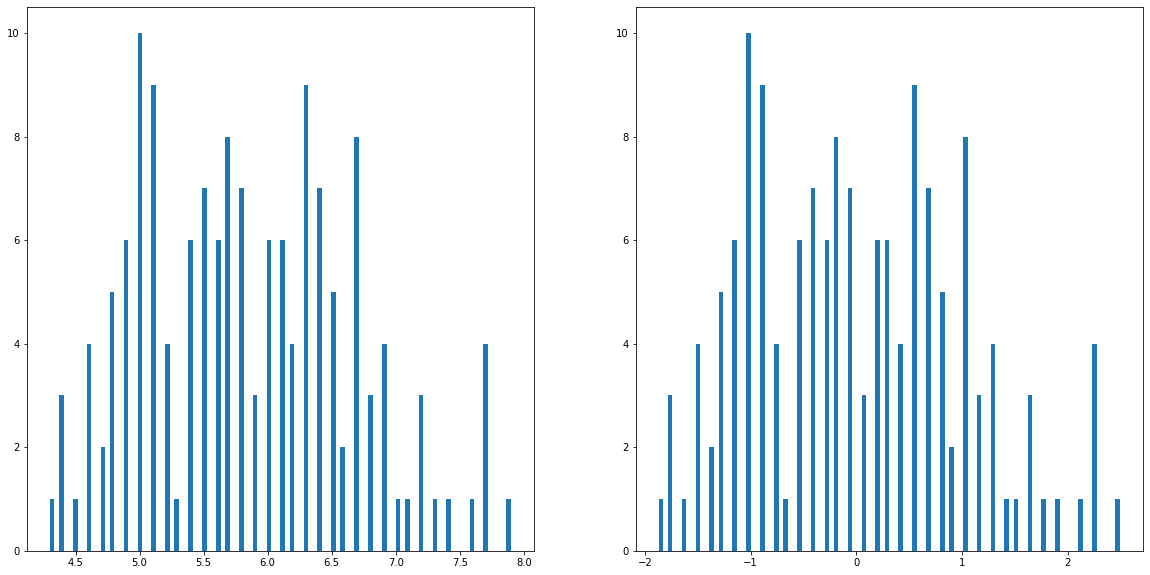

In [7]:
fig1 = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.hist(X[:,0], bins=100)
plt.subplot(122)
plt.hist(X_norm[:,0], bins=100)
plt.show()

# PCA处理

In [8]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_norm)

var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72962445 0.22850762 0.03668922 0.00517871]


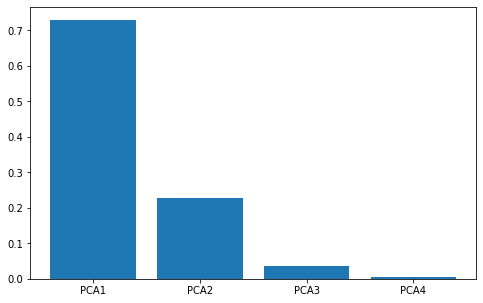

In [10]:
fig2 = plt.figure(figsize=(8, 5))
plt.bar(["PCA1","PCA2","PCA3","PCA4"], var_ratio)
plt.show()

In [11]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_norm)
X_pca_2.shape

(150, 2)

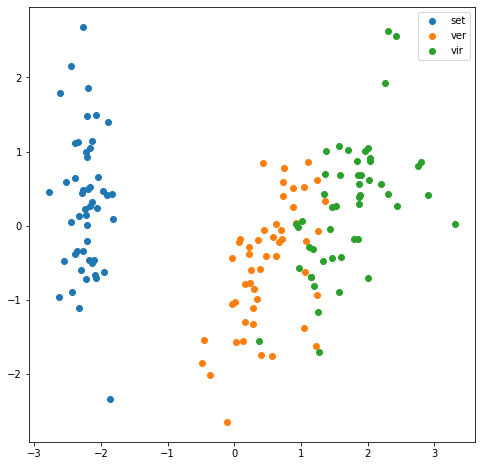

In [12]:
fig3 = plt.figure(figsize=(8, 8))
plt.scatter(X_pca_2[:, 0][y==0], X_pca_2[:, 1][y==0], label="set")
plt.scatter(X_pca_2[:, 0][y==1], X_pca_2[:, 1][y==1], label="ver")
plt.scatter(X_pca_2[:, 0][y==2], X_pca_2[:, 1][y==2], label="vir")
plt.legend()
plt.show()

In [13]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca_2, y)
y_predict = KNN.predict(X_pca_2)
print(KNN.score(X_pca_2, y))

0.9466666666666667


In [14]:
pca_3 = PCA(n_components="mle")
X_pca_3 = pca_3.fit_transform(X_norm)
X_pca_3.shape

(150, 3)

In [15]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_pca_3, y)
y_predict = KNN.predict(X_pca_3)
print(KNN.score(X_pca_3, y))

0.96
